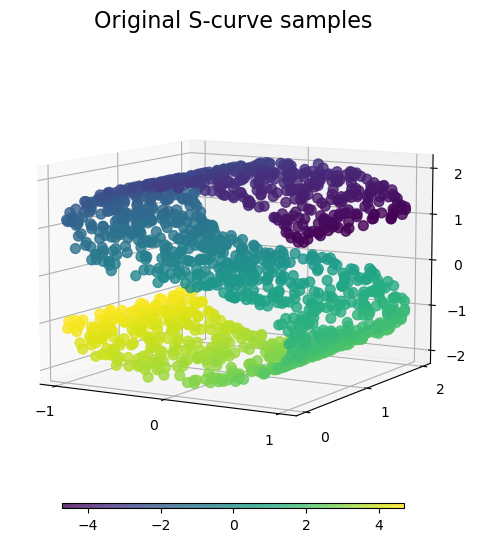

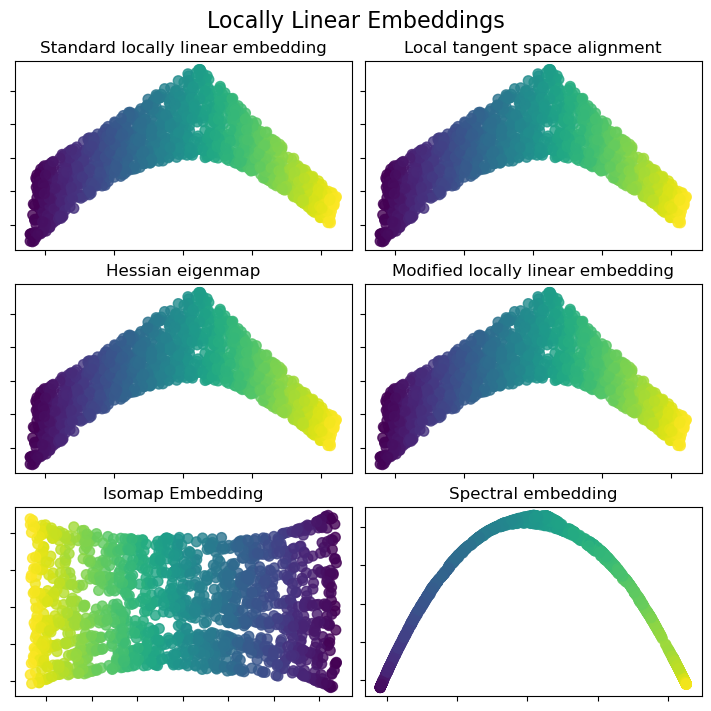

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from utils import *


n_samples = 1500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=0)
Swiss_points, Swiss_color = datasets.make_swiss_roll(n_samples=n_samples, random_state=0)

plot_3d(S_points, S_color, "Original S-curve samples")
# plot_3d(Swiss_points, Swiss_color, "Original S-curve samples")

#-------------- Manifold Learning --------------------
n_neighbors = 12  # neighborhood which is used to recover the locally linear structure
n_components = 2  # number of coordinates for the manifold


params = {
    "n_neighbors": n_neighbors,
    "n_components": n_components,
    "eigen_solver": "auto",
    # "eigen_solver": "arpack",
    "random_state": 0,
}


S_standard = lle_standard(S_points, params)

S_ltsa = lle_ltsa(S_points, params)

S_hessian = lle_hessian(S_points, params)

S_mod = lle_mod(S_points, params)

S_isomap = isomap(S_points, num_components=params['n_components'], 
                  num_neighbors=params['n_neighbors'], p=1)

S_spectral = spectral_Laplacian_Eigen_map(S_points,num_components=params['n_components'], 
                                          num_neighbors=params['n_neighbors'], p=1)


fig, axs = plt.subplots(
    nrows=3, ncols=2, figsize=(7, 7), facecolor="white", constrained_layout=True
)
fig.suptitle("Locally Linear Embeddings", size=16)

lle_methods = [
    ("Standard locally linear embedding", S_standard),
    ("Local tangent space alignment", S_ltsa),
    ("Hessian eigenmap", S_hessian),
    ("Modified locally linear embedding", S_mod),
    ("Isomap Embedding", S_isomap),
    ("Spectral embedding", S_spectral),

]
for ax, method in zip(axs.flat, lle_methods):
    name, points = method
    add_2d_scatter(ax, points, S_color, name)

plt.show()

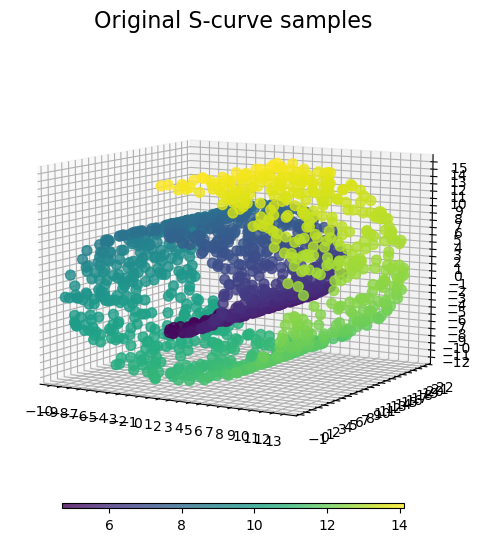

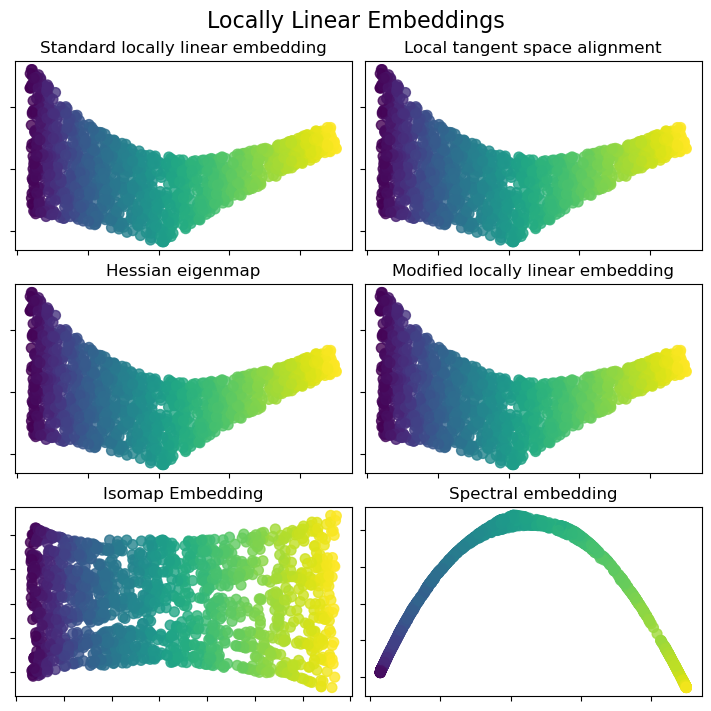

In [2]:
# Swiss Dataset 
plot_3d(Swiss_points, Swiss_color, "Original S-curve samples")

Swiss_standard = lle_standard(Swiss_points, params)

Swiss_ltsa = lle_ltsa(Swiss_points, params)

Swiss_hessian = lle_hessian(Swiss_points, params)

Swiss_mod = lle_mod(Swiss_points, params)

Swiss_isomap = isomap(Swiss_points, num_components=params['n_components'], 
                      num_neighbors=params['n_neighbors'], p=1)

Swiss_spectral = spectral_Laplacian_Eigen_map(Swiss_points,num_components=params['n_components'], 
                                              num_neighbors=params['n_neighbors'], p=1)


fig, axs = plt.subplots(
    nrows=3, ncols=2, figsize=(7, 7), facecolor="white", constrained_layout=True
)
fig.suptitle("Locally Linear Embeddings", size=16)

lle_methods = [
    ("Standard locally linear embedding", Swiss_standard),
    ("Local tangent space alignment", Swiss_ltsa),
    ("Hessian eigenmap", Swiss_hessian),
    ("Modified locally linear embedding", Swiss_mod),
    ("Isomap Embedding", Swiss_isomap),
    ("Spectral embedding", Swiss_spectral),

]
for ax, method in zip(axs.flat, lle_methods):
    name, points = method
    add_2d_scatter(ax, points, Swiss_color, name)

plt.show()